# How does runtime affect ratings across seasons ?

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import json, math
import seaborn as sns
import itertools

In [293]:
genredf=pd.read_csv("genre.csv")

In [294]:
countrydf=pd.read_csv("country.csv")

In [295]:
countrydf.columns

Index(['id', 'title', 'Country', 'USA', 'Canada', 'UK', 'Australia', 'Mexico',
       'Yugoslavia', 'Denmark', 'Netherlands', 'Italy', 'Sweden', 'France',
       'Germany', 'Belgium', 'Japan', 'Austria', 'Switzerland', 'Hungary',
       'Norway', 'Taiwan', 'Philippines', 'South Korea', 'New Zealand',
       'Spain', 'China', 'Cuba', 'Poland', 'Bulgaria', 'Portugal', 'Finland',
       'Brazil', 'Russia', 'Czechoslovakia', 'nan', 'Hong Kong', 'Serbia',
       'Vietnam', 'Greece', 'Argentina', 'Iceland', 'Serbia and Montenegro',
       'Turkey', 'Ireland', 'Croatia', 'India', 'South Africa', 'Luxembourg',
       'Singapore', 'Estonia', 'Israel', 'Romania', 'Bosnia and Herzegovina',
       'Malaysia', 'Czech Republic', 'Colombia', 'Montenegro', 'Chile',
       'Thailand', 'Pakistan', 'Georgia', 'Cyprus', 'United Arab Emirates',
       'Bangladesh', 'Iran', 'Ukraine', 'Kuwait'],
      dtype='object')

In [296]:
ratingsdf=pd.read_csv("ratings.csv")

In [297]:
ratingsdf.columns

Index(['id', 'title', 'Season 1', 'Season 2', 'Season 3', 'Season 4',
       'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9',
       'Season 10'],
      dtype='object')

In [298]:
alldatadf=pd.read_csv("all_data.csv")

In [299]:
alldatadf.columns

Index(['id', 'title', 'total_seasons', 'imdb_votes', 'runtime', 'genre',
       'country', 'writer', 'startYear', 'endYear', 'seasonRating'],
      dtype='object')

In [300]:
countrydf.rename(columns={'nan':'C N/A'}, inplace=True)


In [301]:
countrydf.columns

Index(['id', 'title', 'Country', 'USA', 'Canada', 'UK', 'Australia', 'Mexico',
       'Yugoslavia', 'Denmark', 'Netherlands', 'Italy', 'Sweden', 'France',
       'Germany', 'Belgium', 'Japan', 'Austria', 'Switzerland', 'Hungary',
       'Norway', 'Taiwan', 'Philippines', 'South Korea', 'New Zealand',
       'Spain', 'China', 'Cuba', 'Poland', 'Bulgaria', 'Portugal', 'Finland',
       'Brazil', 'Russia', 'Czechoslovakia', 'C N/A', 'Hong Kong', 'Serbia',
       'Vietnam', 'Greece', 'Argentina', 'Iceland', 'Serbia and Montenegro',
       'Turkey', 'Ireland', 'Croatia', 'India', 'South Africa', 'Luxembourg',
       'Singapore', 'Estonia', 'Israel', 'Romania', 'Bosnia and Herzegovina',
       'Malaysia', 'Czech Republic', 'Colombia', 'Montenegro', 'Chile',
       'Thailand', 'Pakistan', 'Georgia', 'Cyprus', 'United Arab Emirates',
       'Bangladesh', 'Iran', 'Ukraine', 'Kuwait'],
      dtype='object')

In [302]:
countrylist=list(countrydf.columns[3:])

In [303]:
genredf.rename(columns={'nan':'G N/A'}, inplace=True)


In [304]:
totaldf=pd.concat([alldatadf[['id', 'title', 'total_seasons', 'startYear', 'endYear', 'runtime']] ,  ratingsdf.iloc[:, 2:] ], axis=1)

In [305]:
totaldf['runtime'].value_counts()

30.0     1219
60.0     1060
22.0      245
45.0      223
25.0      153
50.0      153
43.0      129
24.0      121
23.0      118
42.0      107
44.0       99
90.0       98
120.0      48
52.0       45
21.0       43
11.0       40
40.0       36
26.0       33
28.0       33
55.0       32
48.0       26
46.0       26
15.0       26
41.0       25
29.0       24
10.0       23
20.0       22
5.0        20
47.0       20
75.0       17
         ... 
133.0       1
535.0       1
171.0       1
69.0        1
130.0       1
469.0       1
453.0       1
31.0        1
584.0       1
800.0       1
285.0       1
374.0       1
522.0       1
115.0       1
74.0        1
172.0       1
228.0       1
410.0       1
307.0       1
210.0       1
93.0        1
650.0       1
343.0       1
165.0       1
752.0       1
33.0        1
37.0        1
39.0        1
544.0       1
156.0       1
Name: runtime, Length: 127, dtype: int64

In [306]:
totaldf['startYear']=totaldf['startYear'].astype(str)

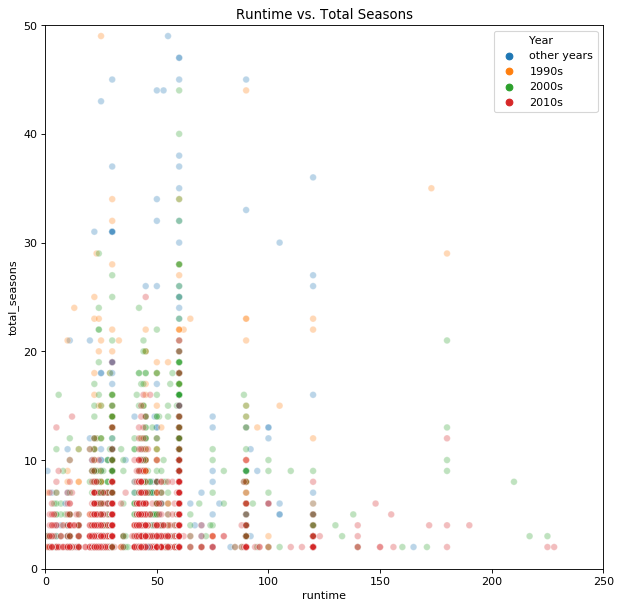

In [307]:
## Novel graph Runtime vs total seasons
fig, ax = plt.subplots(figsize=(9,9), dpi=80)
year=pd.DataFrame()
year= totaldf.copy()

years={'9': "1990s", '0': "2000s",'1': "2010s"}
year['Year']=[years[x[2]] if x[2] in years.keys() else "other years" for x in totaldf['startYear']]

cmap = sns.cubehelix_palette(dark=.9, light=.1, as_cmap=True)
ax=sns.scatterplot(totaldf.runtime, totaldf.total_seasons,hue=year['Year'], alpha=0.3)

plt.ylim(0,50)
plt.xlim(0,250)
plt.title("Runtime vs. Total Seasons")



plt.show()

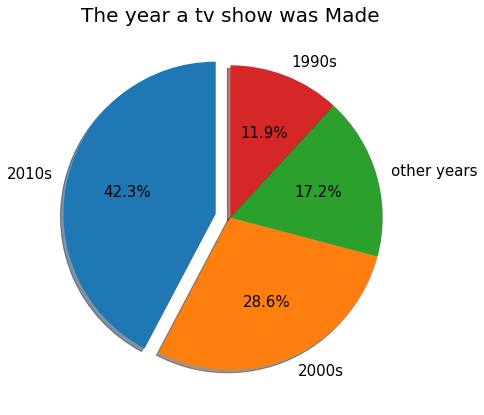

(None,)

In [308]:
fig,x=plt.subplots(figsize=(7,7))
explode=(0.1,0,0,0)
year.Year.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, legend=False, fontsize=15)
ax.axis('equal')
plt.title("The year a tv show was Made", fontsize=20)
plt.axis('off')




plt.show(), 

In [309]:
year['Year'].value_counts()

2010s          2354
2000s          1594
other years     960
1990s           661
Name: Year, dtype: int64

In [310]:
year.shape

(5569, 17)

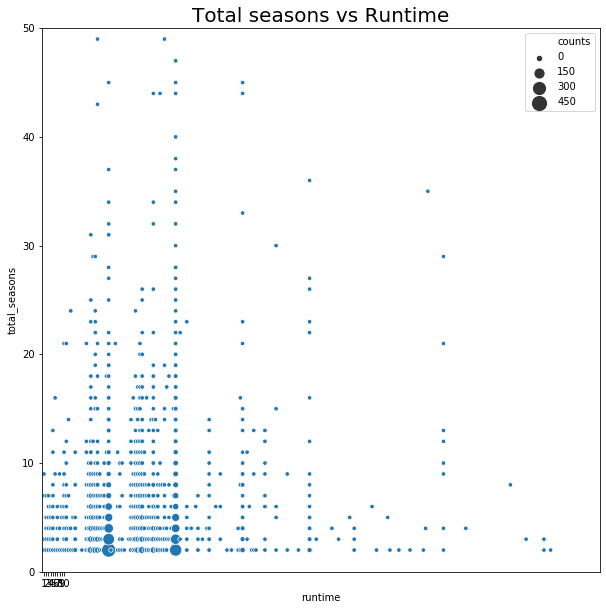

In [311]:
## Novel graph Runtime vs total seasons
fig, ax = plt.subplots(figsize=(10,10))#, dpi=80)
df_counts = totaldf.groupby(['runtime', 'total_seasons']).size().reset_index(name='counts')
#df_counts=df_counts.astype(int)
sns.scatterplot(df_counts.runtime, df_counts.total_seasons, size=df_counts.counts,sizes=(20, 200), ax=ax)
time=range(1,11,1)
ax.set_xticklabels(time)
ax.set_xticks(time)
#plt.xticks(tmp)
plt.title("Total seasons vs Runtime", fontsize=20)
plt.ylim(0,50)
plt.xlim(0,250)


plt.show()

In [312]:
totaldf=pd.merge(totaldf,countrydf, on=['id', 'title'])

C:\Users\oyino\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


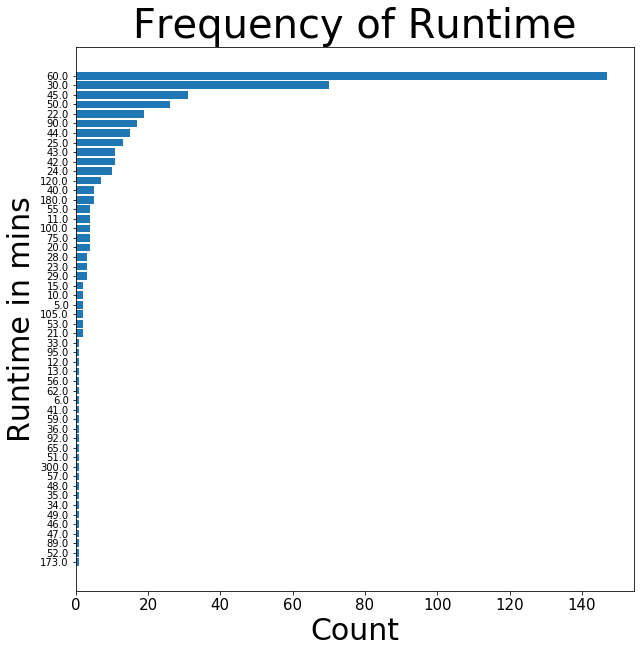

In [313]:
fig, ax = plt.subplots(figsize=(10,10))
ten_seasons = totaldf[totaldf['total_seasons'] >=10].copy()
#ax.figsize=(20,20)
s2 = ten_seasons['runtime'].value_counts().sort_values(ascending=True)
s=dict(s2)
value = list(s.values())
names=list(s.keys())
y_pos = np.arange(len(names))
width=0.8
#rects1=
rects1= ax.barh(y_pos,value,width, align='center')
ax.set_yticks(y_pos)
#ax.set_xticklabels(value, fontsize=30)
ax.tick_params(labelsize=15)
ax.set_yticklabels(names, fontsize=10)
ax.set_ylabel('Runtime in mins', fontsize=30)
ax.set_xlabel('Count', fontsize=30)
ax.set_title('Frequency of Runtime', fontsize=40)

fig.show()



#### Conclude:
60 minute shows make up most of the dataset. 
The top 5 most frequent runtimes are: 60, 40, 45, 50 and 22 mins

In [314]:
#thirtydf=ten_seasons[ten_seasons["runtime"] == "30"]
#hourdf=ten_seasons[ten_seasons["runtime"] == "60"]
#fourtyfivedf=ten_seasons[ten_seasons["runtime"] == "45"]
#fiftydf=ten_seasons[ten_seasons["runtime"] == "50"]
#ttdf=ten_seasons[ten_seasons["runtime"] == "22"]

## Create Runtime Datframe


In [315]:
thirtydf=totaldf[totaldf["runtime"] == 30]
hourdf=totaldf[totaldf["runtime"] == 60]
fourtyfivedf=totaldf[totaldf["runtime"] == 45]
fiftydf=totaldf[totaldf["runtime"] == 50]
ttdf=totaldf[totaldf["runtime"] == 22]

In [316]:
#gets the mean rating for each season and returns it as a list 
def getdfmeans(df,num):
    means = []
   
    if (num==10):
       
        means=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1), round(df['Season 3'].mean(),1), round(df['Season 4'].mean(),1), round(df['Season 5'].mean(),1), round(df['Season 6'].mean(),1), round(df['Season 7'].mean(),1), round(df['Season 8'].mean(),1), round(df['Season 9'].mean(),1), round(df['Season 10'].mean(),1) )
    if(num==5):
        df=df[df['total_seasons']==num]
        means=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1), round(df['Season 3'].mean(),1), round(df['Season 4'].mean(),1), round(df['Season 5'].mean(),1))
    if (num==2):
        df=df[df['total_seasons']==num]
        means=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1))
               
    return means

In [317]:
#means for shows with at least 10 seasons
num=10
thirty_ten_mean=getdfmeans(thirtydf[thirtydf['total_seasons']>=num], num)
hour_ten_mean=getdfmeans(hourdf[hourdf['total_seasons']>=num], num)
fourtyfive_ten_means=getdfmeans(fourtyfivedf[fourtyfivedf['total_seasons']>=num], num)
fifty_ten_means=getdfmeans(fiftydf[fiftydf['total_seasons']>=num], num)
tt_ten_means=getdfmeans(ttdf[ttdf['total_seasons']>=num], num)

In [318]:
def graphPlot(thirty, hour, fourtyfive, fifty, twentytwo, seasons):
    time=range(1,seasons+1,1)
    fig, ax = plt.subplots(figsize=(10,7))
    #fig,ax=plt.subplots()
    ax.plot(time, hour,'ko-', label='60 mins', color='green')
    ax.plot(time, thirty,'ko-', label='30 mins', color='yellow')
    ax.plot(time, fourtyfive, 'ko-',label='45 mins', color='blue')
    ax.plot(time, fifty,'ko-', label='50 mins', color = 'red')
    ax.plot(time, twentytwo, 'ko-', label='22 mins', color = 'brown')
    
    #create a nested list
    a = [thirty, hour, fourtyfive, fifty,twentytwo]
    for means in a:
        #annotate the first and last season's ratings
        for i in (0,(len(means)-1)):
            plt.annotate(means[i], xy=(i+1,means[i]),textcoords="offset points", xytext=(5,5), ha='right')
     
   
            
    legend = ax.legend(loc="upper right")
    plt.xlabel('Seasons', fontsize=20)
    plt.ylabel('Avg. Ratings', fontsize=20)
    plt.title('Ratings of  runtime across seasons', fontsize=25)
    plt.xticks(time, fontsize=15)
    plt.yticks(np.arange(6.5,9,0.5), fontsize=15)
    
    
    #plt.savefig("lineplot3")
    
    #plt.show()

## The best season length for each runtime
    - What is the best season length for each runtime to ensure the ratings that are high and increase acroos the seasons.

In [319]:
#### Ten seasons

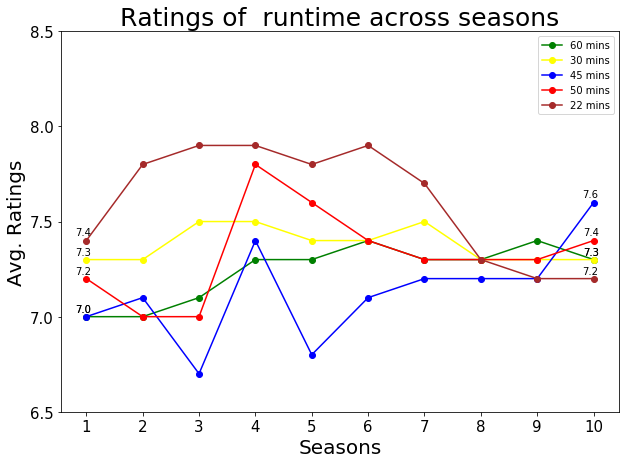

In [320]:
graphPlot(thirty_ten_mean, hour_ten_mean, fourtyfive_ten_means, fifty_ten_means, tt_ten_means, 10)

Results:
- 22 min shows ratings go down over time
- 60 mins shows increase 
- 30 mins stay the same
- 45 increase towards the end
- rating of 50 min shows 

#### Five seasons

In [321]:
num=5

thirty_mean_five=getdfmeans(thirtydf[thirtydf['total_seasons']==num], num)
hour_mean_five=getdfmeans(hourdf[hourdf['total_seasons']==num], num)
fourtyfive_mean_five=getdfmeans(fourtyfivedf[fourtyfivedf['total_seasons']==num], num)
fifty_mean_five=getdfmeans(fiftydf[fiftydf['total_seasons']==num], num)
tt_mean_five=getdfmeans(ttdf[ttdf['total_seasons']==num], num)

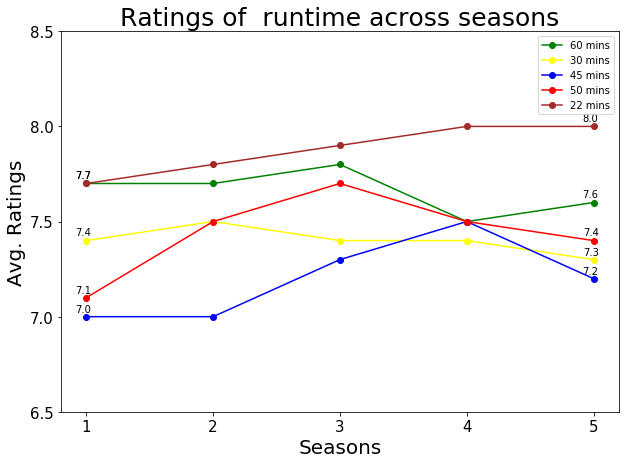

In [322]:
graphPlot(thirty_mean_five, hour_mean_five, fourtyfive_mean_five, fifty_mean_five, tt_mean_five, 5)

Results:
- 22 min shows increase in ratings over time
- 60 mins shows decrease in ratings over time 
- 30 mins shows decrease slightly in ratings over time 
- 45 increase in ratings across the seasons
- 50 mins show increase in ratings across the seasons

#### Two seasons

In [323]:
num=2
#ten_asons=totaldf[totaldf['runtime']==10]
thirty_mean_two=getdfmeans(thirtydf[thirtydf['total_seasons']==num], num)
hour_mean_two=getdfmeans(hourdf[hourdf['total_seasons']==num], num)
fourtyfive_mean_two=getdfmeans(fourtyfivedf[fourtyfivedf['total_seasons']==num], num)
fifty_mean_two=getdfmeans(fiftydf[fiftydf['total_seasons']==num], num)
tt_mean_two=getdfmeans(ttdf[ttdf['total_seasons']==num], num)

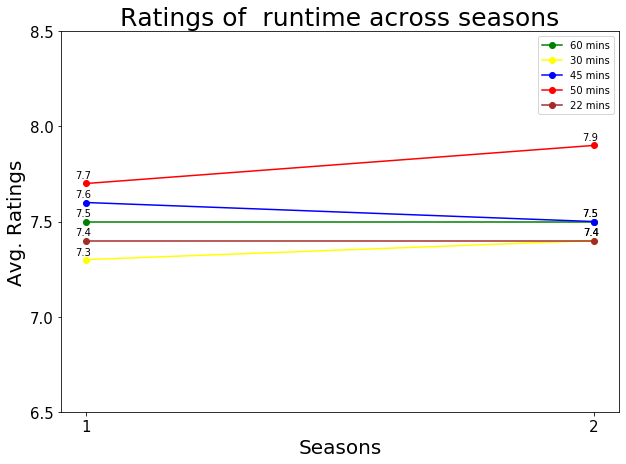

In [324]:
graphPlot(thirty_mean_two, hour_mean_two, fourtyfive_mean_two, fifty_mean_two, tt_mean_two, 2)

Results:
- 22 min shows ratings stay the same 
- ratings of 60 mins shows stay the same
- ratings of 30 mins slightly increase 
- ratings of 45 min shows slightly decrease
- ratings if 50 min shows the greatest increase

## Year
Is there a difference in the runtime ratings of shows made in different decades ?

In [325]:
totaldf['startYear']=totaldf['startYear'].astype(str)

In [326]:
totaldf['startYear'].to_string('startYear')

In [327]:
totaldf[totaldf['startYear'].str.contains("199")]

,id,title,total_seasons,startYear,endYear,runtime,Season 1,Season 2,Season 3,Season 4,...,Chile,Thailand,Pakistan,Georgia,Cyprus,United Arab Emirates,Bangladesh,Iran,Ukraine,Kuwait
716,tt0096565,The Detectives,4.0,1993,1997.0,50.0,7.8,8.1,NaN,7.7,...,,,,,,,,,,
721,tt0096597,"Goede tijden, slechte tijden",29.0,1990,NaN,23.0,NaN,NaN,NaN,NaN,...,,,,,,,,,,
740,tt0098749,"Beverly Hills, 90210",10.0,1990,2000.0,44.0,6.9,6.8,6.7,6.6,...,,,,,,,,,,
741,tt0098752,Bill & Ted's Excellent Adventures,2.0,1990,1991.0,30.0,5.2,NaN,NaN,NaN,...,,,,,,,,,,
742,tt0098763,Captain Planet and the Planeteers,6.0,1990,1996.0,23.0,5.3,3.6,4.6,4.2,...,,,,,,,,,,
743,tt0098765,The Case-Book of Sherlock Holmes,3.0,1991,1993.0,60.0,7.8,7.3,6.8,NaN,...,,,,,,,,,,
744,tt0098774,The Crystal Maze,10.0,1990,2019.0,60.0,NaN,8.7,NaN,NaN,...,,,,,,,,,,
745,tt0098780,Dream On,6.0,1990,1996.0,30.0,6.6,7.3,7.0,6.7,...,,,,,,,,,,
746,tt0098781,Drop the Dead Donkey,6.0,1990,1998.0,NaN,7.4,7.8,8.1,7.7,...,,,,,,,,,,
747,tt0098790,Evening Shade,4.0,1990,1994.0,30.0,7.2,NaN,NaN,NaN,...,,,,,,,,,,


In [328]:
ninetiesdf=totaldf[totaldf['startYear'].str.contains("199")].reset_index(drop=True)

In [329]:
noughtiesdf=totaldf[totaldf['startYear'].str.contains("200")].reset_index(drop=True)

In [330]:
tensdf=totaldf[totaldf['startYear'].str.contains("201")].reset_index(drop=True)

In [331]:
nineties_dict={}
noughties_dict={}
tens_dict={}

In [332]:
#calculate the mean for the runtimes in each decade
def yearMean(df):
    #print(df)
    dict = {}
    dict["60"] = [round(df[df['runtime']== 60]['Season 1'].mean(), 1), round(df[df['runtime']== 60]['Season 2'].mean(), 1), round(df[df['runtime']== 60]['Season 3'].mean(), 1), round(df[df['runtime']== 60]['Season 4'].mean(), 1), round(df[df['runtime']== 60]['Season 5'].mean(), 1), round(df[df['runtime']== 60]['Season 6'].mean(), 1), round(df[df['runtime']== 60]['Season 7'].mean(), 1), round(df[df['runtime']== 60]['Season 8'].mean(), 1), round(df[df['runtime']== 60]['Season 9'].mean(), 1), round(df[df['runtime']== 60]['Season 10'].mean(), 1)]
    dict["30"] = [round(df[df['runtime']== 30]['Season 1'].mean(), 1), round(df[df['runtime']== 30]['Season 2'].mean(), 1), round(df[df['runtime']== 30]['Season 3'].mean(), 1), round(df[df['runtime']== 30]['Season 4'].mean(), 1), round(df[df['runtime']== 30]['Season 5'].mean(), 1), round(df[df['runtime']== 30]['Season 6'].mean(), 1), round(df[df['runtime']== 30]['Season 7'].mean(), 1), round(df[df['runtime']== 30]['Season 8'].mean(), 1), round(df[df['runtime']== 30]['Season 9'].mean(), 1), round(df[df['runtime']== 30]['Season 10'].mean(), 1)]
    dict["45"] = [round(df[df['runtime']== 45]['Season 1'].mean(), 1), round(df[df['runtime']== 45]['Season 2'].mean(), 1), round(df[df['runtime']== 45]['Season 3'].mean(), 1), round(df[df['runtime']== 45]['Season 4'].mean(), 1), round(df[df['runtime']== 45]['Season 5'].mean(), 1), round(df[df['runtime']== 45]['Season 6'].mean(), 1), round(df[df['runtime']== 45]['Season 7'].mean(), 1), round(df[df['runtime']== 45]['Season 8'].mean(), 1), round(df[df['runtime']== 45]['Season 9'].mean(), 1), round(df[df['runtime']== 45]['Season 10'].mean(), 1)]
    dict["25"] = [round(df[df['runtime']== 25]['Season 1'].mean(), 1), round(df[df['runtime']== 25]['Season 2'].mean(), 1), round(df[df['runtime']== 25]['Season 3'].mean(), 1), round(df[df['runtime']== 25]['Season 4'].mean(), 1), round(df[df['runtime']== 25]['Season 5'].mean(), 1), round(df[df['runtime']== 25]['Season 6'].mean(), 1), round(df[df['runtime']== 25]['Season 7'].mean(), 1), round(df[df['runtime']== 25]['Season 8'].mean(), 1), round(df[df['runtime']== 25]['Season 9'].mean(), 1), round(df[df['runtime']== 25]['Season 10'].mean(), 1)]
    dict["50"] = [round(df[df['runtime']== 50]['Season 1'].mean(), 1), round(df[df['runtime']== 50]['Season 2'].mean(), 1), round(df[df['runtime']== 50]['Season 3'].mean(), 1), round(df[df['runtime']== 50]['Season 4'].mean(), 1), round(df[df['runtime']== 50]['Season 5'].mean(), 1), round(df[df['runtime']== 50]['Season 6'].mean(), 1), round(df[df['runtime']== 50]['Season 7'].mean(), 1), round(df[df['runtime']== 50]['Season 8'].mean(), 1), round(df[df['runtime']== 50]['Season 9'].mean(), 1), round(df[df['runtime']== 50]['Season 10'].mean(), 1)]
    
    return dict

In [333]:
yearMean(ninetiesdf[ninetiesdf['total_seasons']>=10])

{'60': [7.2, 7.7, 7.6, 7.3, 7.3, 7.8, 7.3, 7.6, 7.0, 7.7],
 '30': [7.0, 7.1, 7.3, 7.6, 7.7, 7.5, 7.1, 7.2, 6.9, 7.1],
 '45': [6.8, 6.5, 6.1, 6.8, 6.4, 6.7, 6.7, 6.6, 7.0, 7.3],
 '25': [6.5, 5.6, 5.8, 5.8, 6.1, 7.0, 5.7, 6.6, 6.1, 6.2],
 '50': [7.6, 6.8, 7.3, 7.9, 7.4, 7.2, 7.8, 7.8, 7.3, 7.8]}

In [334]:
nineties_dict= yearMean(ninetiesdf[ninetiesdf['total_seasons']>=10])
noughties_dict = yearMean(noughtiesdf[noughtiesdf['total_seasons']>=10])
tens_dict = yearMean(tensdf[tensdf['total_seasons']>=10])

In [335]:
noughties_dict

{'60': [6.9, 6.9, 7.0, 7.1, 7.4, 7.3, 7.4, 7.2, 7.5, 7.2],
 '30': [6.9, 6.9, 7.6, 7.4, 7.7, 7.5, 7.7, 7.3, 7.4, 7.1],
 '45': [7.6, 7.8, 8.0, 8.1, 7.4, 7.5, 7.7, 7.9, 7.6, 7.6],
 '25': [5.3, 6.9, nan, nan, nan, nan, nan, nan, 7.4, nan],
 '50': [7.3, 7.2, 6.3, 7.7, 7.8, 7.4, 7.1, 7.6, 7.3, 6.8]}

In [336]:
tens_dict

{'60': [7.3, 7.3, 7.2, 7.5, 7.5, 7.5, 7.2, 7.2, 7.6, 7.8],
 '30': [7.0, 7.6, 7.8, 7.2, 7.8, 7.3, 8.1, 7.8, 8.0, 7.4],
 '45': [5.8, 7.3, 6.6, 8.3, 5.8, 7.7, 7.0, 8.3, 8.3, 8.4],
 '25': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 '50': [6.9, nan, 7.7, nan, nan, nan, nan, nan, nan, 8.4]}

In [337]:
seasons=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9', 'Season 10']

In [338]:
#calculates the mean ratings fot a decade
def calc_average(df):
    sum = 0
    for i in seasons:
        sum=sum+df[i].mean()
        
    avg=round(sum/len(seasons),1)
    return avg
    #print(avg)

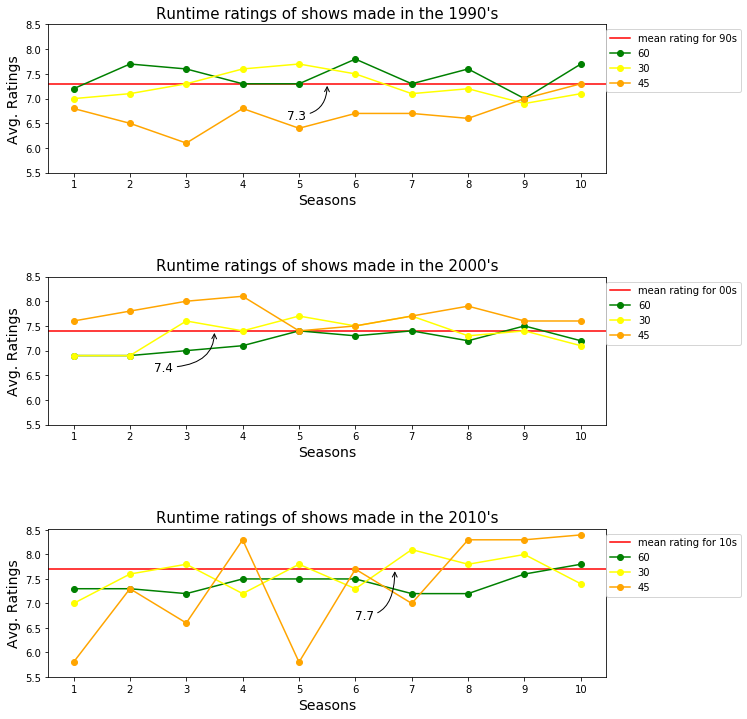

In [339]:
#fig, ax = plt.subplots(figsize=(10,5))
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,12))
time=range(1,11,1)
#ax.plot(time)
g=calc_average(ninetiesdf)

axs[0].axhline(y=g, color='r', linestyle='-', label="mean rating for 90s")
axs[0].plot(time, nineties_dict["60"],'ko-', label='60', color='green')
axs[0].plot(time, nineties_dict["30"],'ko-', label='30', color='yellow')
axs[0].plot(time, nineties_dict["45"],'ko-', label='45', color='orange')

axs[0].set_yticks(np.arange(5.5,9,0.5))
axs[0].set_xticks(time)
axs[0].set_ylabel("Avg. Ratings", fontsize=14)
axs[0].set_xlabel("Seasons", fontsize=14)
axs[0].set_title("Runtime ratings of shows made in the 1990's", fontsize=15)



axs[0].annotate(g,
            xy=(5.5, g), xycoords='data',
            xytext=(-40, -35), textcoords='offset points', fontsize=12, color='black',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))


g=calc_average(noughtiesdf)
axs[1].axhline(y=g, color='r', linestyle='-', label="mean rating for 00s")
axs[1].plot(time, noughties_dict["60"],'ko-', label='60', color='green')
axs[1].plot(time, noughties_dict["30"], 'ko-',label='30', color='yellow')
axs[1].plot(time, noughties_dict["45"],'ko-', label='45', color='orange')

axs[1].set_yticks(np.arange(5.5,9,0.5))
axs[1].set_xticks(time)
axs[1].set_ylabel("Avg. Ratings", fontsize=14)
axs[1].set_xlabel("Seasons", fontsize=14)
axs[1].set_title("Runtime ratings of shows made in the 2000's", fontsize=15)

axs[1].annotate(g,
            xy=(3.5, g), xycoords='data',
            xytext=(-60, -40), textcoords='offset points', fontsize=12, color='black',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3, angleA=0, angleB=-90"))#,angleA=0,angleB=-0"))

g=calc_average(tensdf)
axs[2].axhline(y=g, color='r', linestyle='-',label="mean rating for 10s")
axs[2].plot(time, tens_dict["60"], 'ko-', label='60', color='green')
axs[2].plot(time, tens_dict["30"], 'ko-',label='30', color='yellow')
axs[2].plot(time, tens_dict["45"], 'ko-',label='45', color='orange')

axs[2].set_yticks(np.arange(5.5,9,0.5))
axs[2].set_xticks(time)
axs[2].set_ylabel("Avg. Ratings", fontsize=14)
axs[2].set_xlabel("Seasons", fontsize=14)
axs[2].set_title("Runtime ratings of shows made in the 2010's", fontsize=15)


axs[2].annotate(g,#'angle3,\nangle -90',
            xy=(6.7, g), xycoords='data',
            xytext=(-40, -50), textcoords='offset points', fontsize=12, color='black',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

axs[0].legend(loc="upper right",bbox_to_anchor=(1.25, 1))
axs[1].legend(loc="upper right",bbox_to_anchor=(1.25, 1))
axs[2].legend(loc="upper right",bbox_to_anchor=(1.25, 1))

plt.subplots_adjust(hspace=0.7)

#plt.savefig("decadesplot")

From this we can see how things have changed throughout the decades before longer shows of 60 minutes did best across the seasons while in recent decades shorter running shows of 45 and 30 minutes have been what is best to achieve a show that has high ratings across seasons. 

In [340]:
countrylist = list(ten_seasons.columns[17:])
#countrylist

In [341]:
countryfreq={}
#genredict = {}
for i in countrylist:
    count=0
    for j, value in ten_seasons.iterrows():
        if(ten_seasons[i][j] == "true"):
            count=count+1
    countryfreq[i] = count 

In [342]:
sorted(countryfreq.items(), key=lambda x: x[1])

[('Mexico', 0),
 ('Yugoslavia', 0),
 ('Switzerland', 0),
 ('Hungary', 0),
 ('New Zealand', 0),
 ('Cuba', 0),
 ('Poland', 0),
 ('Bulgaria', 0),
 ('Portugal', 0),
 ('Czechoslovakia', 0),
 ('Hong Kong', 0),
 ('Serbia', 0),
 ('Vietnam', 0),
 ('Argentina', 0),
 ('Iceland', 0),
 ('Serbia and Montenegro', 0),
 ('Turkey', 0),
 ('Ireland', 0),
 ('India', 0),
 ('South Africa', 0),
 ('Luxembourg', 0),
 ('Israel', 0),
 ('Malaysia', 0),
 ('Czech Republic', 0),
 ('Colombia', 0),
 ('Montenegro', 0),
 ('Chile', 0),
 ('Thailand', 0),
 ('Pakistan', 0),
 ('Georgia', 0),
 ('Cyprus', 0),
 ('United Arab Emirates', 0),
 ('Bangladesh', 0),
 ('Iran', 0),
 ('Ukraine', 0),
 ('Kuwait', 0),
 ('Norway', 1),
 ('Taiwan', 1),
 ('Philippines', 1),
 ('South Korea', 1),
 ('China', 1),
 ('Brazil', 1),
 ('Greece', 1),
 ('Croatia', 1),
 ('Estonia', 1),
 ('Bosnia and Herzegovina', 1),
 ('Denmark', 2),
 ('Sweden', 2),
 ('Finland', 2),
 ('Russia', 2),
 ('Singapore', 2),
 ('Romania', 2),
 ('Italy', 3),
 ('Belgium', 3),
 ('Austr

In [343]:
usadf=ten_seasons[ten_seasons['USA']=="true"]
ukdf=ten_seasons[ten_seasons['UK']=="true"]
candf=ten_seasons[ten_seasons['Canada']=="true"]
#japdf=ten_seasons[ten_seasons['Japan']=="true"]
gerdf=ten_seasons[ten_seasons["Germany"]=="true"]


In [347]:
usa_dict={}

usa_dict["60"] = getdfmeans(usadf[usadf["runtime"]==60], 10)
usa_dict["30"] = getdfmeans(usadf[usadf["runtime"]==30], 10)


In [348]:
usa_dict

{'60': (6.9, 6.9, 7.0, 7.2, 7.3, 7.3, 7.2, 7.3, 7.4, 7.4),
 '30': (7.2, 7.2, 7.3, 7.2, 7.3, 7.3, 7.4, 7.4, 7.3, 7.3)}

In [349]:
uk_dict={}

uk_dict["60"] = getdfmeans(ukdf[ukdf["runtime"]==60], 10)
uk_dict["30"] = getdfmeans(ukdf[ukdf["runtime"]==30], 10)

In [350]:
can_dict={}
can_dict["60"] = getdfmeans(candf[candf["runtime"]==60], 10)
can_dict["30"] = getdfmeans(candf[candf["runtime"]==30], 10)

In [351]:
ger_dict={}
ger_dict["60"] = getdfmeans(gerdf[gerdf["runtime"]==60], 10)
ger_dict["30"] = getdfmeans(gerdf[gerdf["runtime"]==30], 10)

In [352]:
def graphCountry(mins):
    fig, ax = plt.subplots(figsize=(8,6))
    time=range(1,11,1)
    ax.plot(time, ger_dict[mins], label='Germany')
    ax.plot(time, usa_dict[mins], label='USA')
    ax.plot(time, can_dict[mins], label='Canada')
    ax.plot(time, uk_dict[mins], label='UK')

    legend = ax.legend(loc="upper right",bbox_to_anchor=(1.1, 1.0))
    plt.xlabel('Seasons', fontsize=15)

    plt.ylabel('Avg. Ratings', fontsize=15)
    plt.title('Ratings of ' + mins +' mins shows across different countries', fontsize=20)
    plt.xticks(time, fontsize=10)
    plt.ylim(4.5,9.5)
    
    plt.savefig("country2plot")

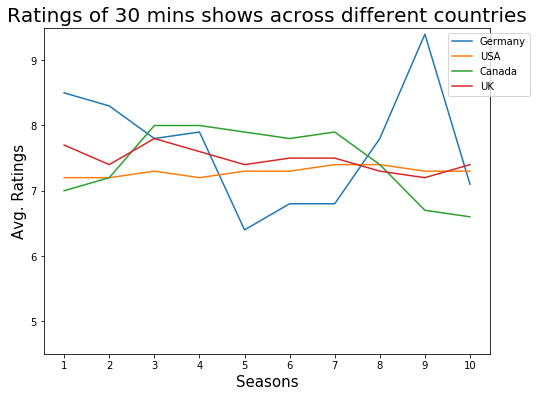

In [353]:
graphCountry("30")

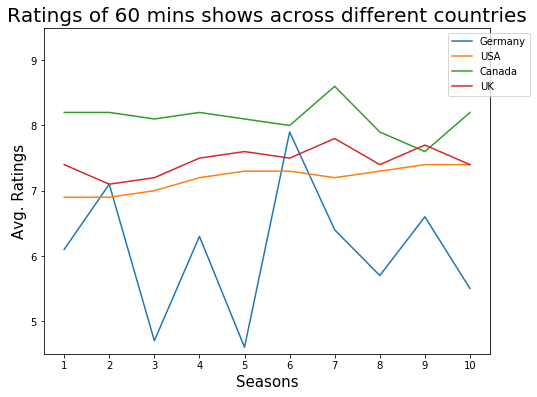

In [354]:
graphCountry("60")

#### Conclude: 
- Germany: 30-minute shows are consistently high across the ten seasons. The ratings for 60-minute shows made in Germany are a lot lower in ratings than in other countries.  
- US: ratings of 30-minute shows has ratings lower than that of 60 mins shows 
- Canada: both runtimes experience a lot of fluctuations in ratings across seasons. However, ratings of 30 minutes show are much higher than that of 60 mins shows
- UK: ratings of 30 minute and 60-minute shows are pretty similar. 60 mins shows have a steady increase in ratings in contrast to 30 mins which slowly declines over the seasons
- The UK, Canada, Germany are better producers of 30-minute shows. While the US are better producers of 60-minute shows 
